# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=fa155f289f3172cf9abd2af4cdecec138c1b675550ed2b7c65214a571f401698
  Stored in directory: c:\users\ezgal\appdata\local\pip\cache\wheels\eb\07\14\1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy


In [3]:
from citipy import citipy

In [4]:
import requests 
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from api_keys import (weather_api_key, g_key)

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
#having a look at the json
url = f"http://api.openweathermap.org/data/2.5/weather?q={cities[0]}&appid={weather_api_key}"
response = requests.get(url).json()
print(json.dumps(response, indent = 4, sort_keys = True))


{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 29.06,
        "lon": -13.56
    },
    "dt": 1601298955,
    "id": 2510573,
    "main": {
        "feels_like": 294.57,
        "humidity": 54,
        "pressure": 1014,
        "temp": 300.15,
        "temp_max": 300.15,
        "temp_min": 300.15
    },
    "name": "Teguise",
    "sys": {
        "country": "ES",
        "id": 2379,
        "sunrise": 1601275550,
        "sunset": 1601318616,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 11.3
    }
}


In [6]:
#creating empty lists for each data output
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

cities = []

count = 1
while len(cities) < 600:
    
    #creating random cities
    latitude = np.random.uniform(-90, 90)
    longitude = np.random.uniform(-180, 180)
    city = citipy.nearest_city(latitude, longitude)
    city_name = city.city_name
     
    
    #checking the city exists in the API record
    try:
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}"
        
        response = requests.get(url).json()
        
        the_city_name = response['name']
                      
        if the_city_name not in cities:
            
            #eliminating values with humidity greater than 100
            if response['main']['humidity'] < 101:
                
                cities.append(the_city_name)
        
                #appending data to corresponding list
                cloudiness.append(response['clouds']['all'])
                country.append(response['sys']['country'])
                date.append(response['dt'])
                humidity.append(response['main']['humidity'])
                lat.append(response['coord']['lat'])
                lng.append(response['coord']['lon'])
                max_temp.append(response['main']['temp_max'])
                wind_speed.append(response['wind']['speed'])
        
                print(f'Processing Record {count} | {the_city_name}')
        
                #Record counter
                count += 1
            
            else:
                continue
        
        else:
            continue  
    
    except:
        print(f'City not found. Skipping...')

Processing Record 1 | Muli
Processing Record 2 | Busselton
Processing Record 3 | Bindi
Processing Record 4 | Kapaa
Processing Record 5 | Varaždin
Processing Record 6 | Paamiut
Processing Record 7 | Ushuaia
Processing Record 8 | Yataity
Processing Record 9 | Penzance
Processing Record 10 | Thompson
Processing Record 11 | Whitianga
Processing Record 12 | Hermanus
Processing Record 13 | Arraial do Cabo
Processing Record 14 | Tokur
Processing Record 15 | Vaini
Processing Record 16 | Rikitea
Processing Record 17 | Ribeira Brava
Processing Record 18 | Butaritari
Processing Record 19 | Batote
Processing Record 20 | Pusad
Processing Record 21 | Mar del Plata
Processing Record 22 | Punta Arenas
Processing Record 23 | Tsabong
Processing Record 24 | Markova
Processing Record 25 | Tasiilaq
Processing Record 26 | Cape Town
Processing Record 27 | Saint-Philippe
City not found. Skipping...
Processing Record 28 | Yellowknife
Processing Record 29 | Narsaq
Processing Record 30 | Glomfjord
Processing Rec

Processing Record 219 | Mazyr
Processing Record 220 | Auki
Processing Record 221 | Nizhniy Odes
Processing Record 222 | Baillif
City not found. Skipping...
Processing Record 223 | Aswān
Processing Record 224 | Ahipara
Processing Record 225 | Shimoda
Processing Record 226 | Hualmay
City not found. Skipping...
Processing Record 227 | San Rafael
Processing Record 228 | Atasū
Processing Record 229 | San Quintín
Processing Record 230 | Hong Kong
Processing Record 231 | Tiksi
Processing Record 232 | Alice Springs
Processing Record 233 | Umluj
Processing Record 234 | Berlevåg
Processing Record 235 | Vestmannaeyjar
Processing Record 236 | Ocampo
City not found. Skipping...
City not found. Skipping...
Processing Record 237 | Waipawa
Processing Record 238 | Tessalit
Processing Record 239 | Kahului
Processing Record 240 | Novaya Igirma
Processing Record 241 | Pyn U Lwin
Processing Record 242 | Te Anau
Processing Record 243 | Marevo
Processing Record 244 | Xique-Xique
Processing Record 245 | Padil

Processing Record 425 | Cayenne
Processing Record 426 | Andenes
City not found. Skipping...
Processing Record 427 | Zemio
City not found. Skipping...
Processing Record 428 | Lagos
City not found. Skipping...
Processing Record 429 | Przasnysz
Processing Record 430 | Mulino
Processing Record 431 | Hobyo
Processing Record 432 | Mount Gambier
Processing Record 433 | Viedma
Processing Record 434 | Chāndpur
Processing Record 435 | Cabedelo
Processing Record 436 | Nome
Processing Record 437 | Maceió
City not found. Skipping...
City not found. Skipping...
Processing Record 438 | Charlestown
Processing Record 439 | Olafsvik
Processing Record 440 | Santo Antônio do Içá
Processing Record 441 | Juba
Processing Record 442 | Martapura
Processing Record 443 | Sørland
Processing Record 444 | São José da Coroa Grande
City not found. Skipping...
Processing Record 445 | Talnakh
City not found. Skipping...
Processing Record 446 | Tomatlán
City not found. Skipping...
Processing Record 447 | Alofi
Processin

In [7]:
#checking all lists have the same data -> this means no missing values. 
print(len(cities))
print(len(cloudiness))
print(len(country))
print(len(date))
print(len(humidity))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(wind_speed))

600
600
600
600
600
600
600
600
600


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#build data frame
city_df = pd.DataFrame({
    "City": cities, 
    "Lat": lat,
    "Lng": lng,
    "Max_Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Date": date,
    "Country": country,
})

city_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date,Country
0,Muli,2.92,73.57,301.06,76,100,4.13,1601610195,MV
1,Busselton,-33.65,115.33,290.37,43,36,7.33,1601610195,AU
2,Bindi,9.92,-11.45,294.69,97,100,1.45,1601610196,SL
3,Kapaa,22.08,-159.32,302.15,66,1,4.10,1601610196,US
4,Varaždin,46.30,16.34,282.04,99,89,1.76,1601610197,HR


In [9]:
city_df.dtypes

City           object
Lat           float64
Lng           float64
Max_Temp      float64
Humidity        int64
Cloudiness      int64
Wind_Speed    float64
Date            int64
Country        object
dtype: object

In [10]:
#Changing temperature from Kelvin to Celcius
city_df['Max_Temp'] = city_df['Max_Temp'] - 273.15
city_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date,Country
0,Muli,2.92,73.57,27.91,76,100,4.13,1601610195,MV
1,Busselton,-33.65,115.33,17.22,43,36,7.33,1601610195,AU
2,Bindi,9.92,-11.45,21.54,97,100,1.45,1601610196,SL
3,Kapaa,22.08,-159.32,29.00,66,1,4.10,1601610196,US
4,Varaždin,46.30,16.34,8.89,99,89,1.76,1601610197,HR


In [11]:
#changing wind speed miles per second to kmph
city_df["Wind_Speed"] = city_df["Wind_Speed"] * 3.6
city_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date,Country
0,Muli,2.92,73.57,27.91,76,100,14.868,1601610195,MV
1,Busselton,-33.65,115.33,17.22,43,36,26.388,1601610195,AU
2,Bindi,9.92,-11.45,21.54,97,100,5.220,1601610196,SL
3,Kapaa,22.08,-159.32,29.00,66,1,14.760,1601610196,US
4,Varaždin,46.30,16.34,8.89,99,89,6.336,1601610197,HR


In [12]:
city_df = city_df.rename({"Max_Temp" : "Temp (C)", "Wind_Speed": "Wind_Speed (kmph)"}, axis = 1)

In [13]:
city_df.head()

,City,Lat,Lng,Temp (C),Humidity,Cloudiness,Wind_Speed (kmph),Date,Country
0,Muli,2.92,73.57,27.91,76,100,14.868,1601610195,MV
1,Busselton,-33.65,115.33,17.22,43,36,26.388,1601610195,AU
2,Bindi,9.92,-11.45,21.54,97,100,5.220,1601610196,SL
3,Kapaa,22.08,-159.32,29.00,66,1,14.760,1601610196,US
4,Varaždin,46.30,16.34,8.89,99,89,6.336,1601610197,HR


In [14]:
#export CSV
city_df.to_csv('../output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
city_df.loc[city_df['Humidity'] > 100].count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Date          0
dtype: int64

In [37]:
#maximum humidity
city_df['Humidity'].max()

100

In [3]:
#  Get the indices of cities that have humidity over 100%.


In [4]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

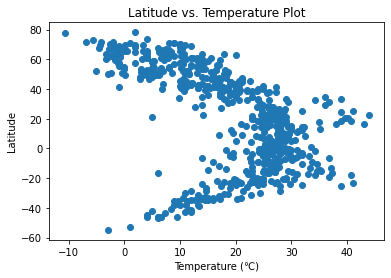

In [47]:
%matplotlib inline 
plt.scatter(city_df['Temp (C)'], city_df['Lat'])

#labels
plt.title("Latitude vs. Temperature Plot")
plt.ylabel('Latitude')
plt.xlabel("Temperature (℃)")
plt.savefig("../output_data/lat_temp.png")

## Latitude vs. Humidity Plot

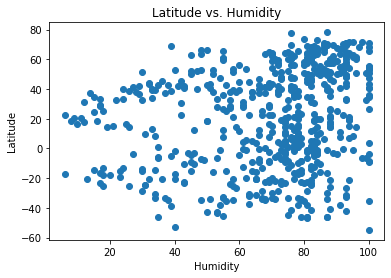

In [15]:
%matplotlib inline
plt.scatter(city_df['Humidity'], city_df['Lat'])

#labels
plt.title("Latitude vs. Humidity")
plt.ylabel('Latitude')
plt.xlabel("Humidity")
plt.savefig("../output_data/lat_humidity.png")

## Latitude vs. Cloudiness Plot

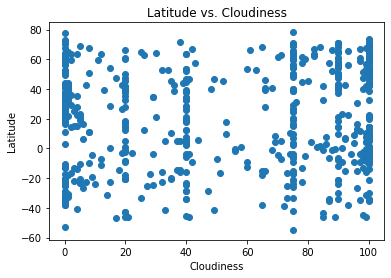

In [16]:
plt.scatter(city_df['Cloudiness'], city_df['Lat'])

#labels
plt.title("Latitude vs. Cloudiness")
plt.ylabel('Latitude')
plt.xlabel("Cloudiness")
plt.savefig("../output_data/lat_cloudiness.png")

## Latitude vs. Wind Speed Plot

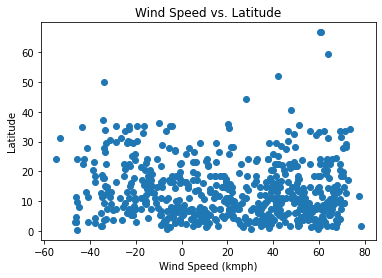

In [48]:
plt.scatter(city_df['Lat'], city_df['Wind_Speed (kmph)'])

#labels
plt.title("Wind Speed vs. Latitude")
plt.xlabel('Wind Speed (kmph)')
plt.ylabel("Latitude")
plt.savefig("../output_data/lat_windspeed.png")

## Linear Regression

In [51]:
#creating southen hemisphere dataframe
southern_cities = city_df.loc[city_df['Lat']<0][["City", "Lat","Lng", "Temp (C)", "Humidity","Cloudiness","Wind_Speed (kmph)"]]

#printing values
print(f"This is the maximum latitude value for the southen hemisphere cities: {southern_cities['Lat'].max()}")
print(f"This is the total number of cities in the southern hemisphere Data Frame: {len(southern_cities)}")

This is the maximum latitude value for the southen hemisphere cities: -0.32
This is the total number of cities in the southern hemisphere Data Frame: 194


In [52]:
#creating northern hemisphere data frame
northern_cities = city_df.loc[city_df['Lat']>0][["City", "Lat","Lng", "Temp (C)", "Humidity","Cloudiness","Wind_Speed (kmph)"]]

#printing values
print(f"This is the minimum latitude value for the northern hemisphere cities: {northern_cities['Lat'].min()}")
print(f'This is the total number of cities in the northern hemisphere Data Frame: {len(northern_cities)}')

This is the minimum latitude value for the northern hemisphere cities: 0.53
This is the total number of cities in the northern hemisphere Data Frame: 406


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

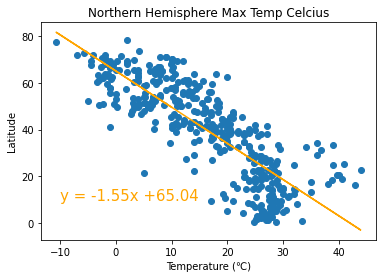

In [55]:
north_lat = northern_cities['Lat']
temp = northern_cities['Temp (C)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(temp, north_lat)

# Get regression values
regress_values = temp * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plotting

plt.scatter(temp, north_lat)
plt.plot(temp,regress_values,"orange")

#labels
plt.title("Northern Hemisphere Max Temp Celcius")
plt.xlabel('Temperature (℃)')
plt.ylabel("Latitude")
plt.annotate(line_eq,(-10, 10),fontsize=15,color="orange")
plt.savefig("../output_data/north_maxtemp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

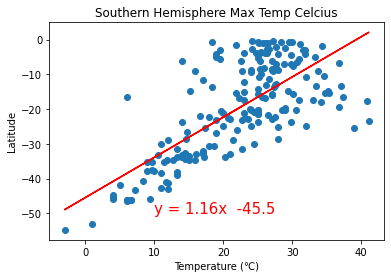

In [54]:
southern_lat = southern_cities['Lat']
temp = southern_cities['Temp (C)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(temp, southern_lat)

# Get regression values
regress_values = temp * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x  " + str(round(intercept,2))

#plotting

plt.scatter(temp, southern_lat)
plt.plot(temp,regress_values,"red")

#labels
plt.title("Southern Hemisphere Max Temp Celcius")
plt.xlabel('Temperature (℃)')
plt.ylabel("Latitude")
plt.annotate(line_eq,(10, -50),fontsize=15,color="red")
plt.savefig("../output_data/south_maxtemp.png")

Observations

Both graphs convey the same point: as the latitude gets closer to 0, the temperature increases. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

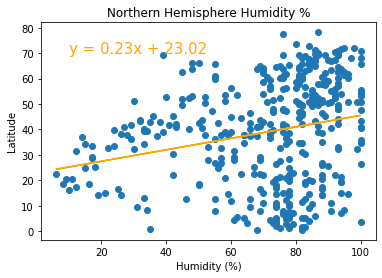

In [28]:
humd = northern_cities['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(humd, north_lat)

# Get regression values
regress_values = humd * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting

plt.scatter(humd, north_lat)
plt.plot(humd,regress_values,"orange")

#labels
plt.title("Northern Hemisphere Humidity %")
plt.xlabel('Humidity (%)')
plt.ylabel("Latitude")
plt.annotate(line_eq,(10, 70),fontsize=15,color="orange")
plt.savefig("../output_data/north_humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

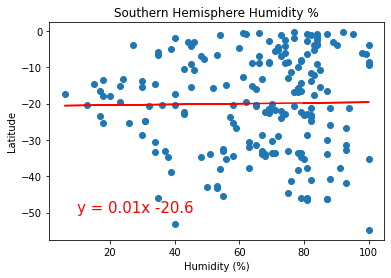

In [31]:
humd = southern_cities['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(humd, southern_lat)

# Get regression values
regress_values = humd * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

#plotting

plt.scatter(humd, southern_lat)
plt.plot(humd,regress_values,"red")

#labels
plt.title("Southern Hemisphere Humidity %")
plt.xlabel('Humidity (%)')
plt.ylabel("Latitude")
plt.annotate(line_eq,(10, -50),fontsize=15,color="red")
plt.savefig("../output_data/south_humidity.png")

#observa

It can clearly be observed that Humidity rises towards the north. 
On the southern hemisphere plot we see Humidity rising towards the equator where in the northern hemisphere we see the trend continuing increasing as latitude increases

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

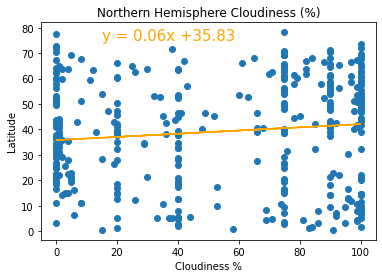

In [32]:
cloud = northern_cities['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cloud, north_lat)

# Get regression values
regress_values = cloud * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plotting

plt.scatter(cloud, north_lat)
plt.plot(cloud,regress_values,"orange")

#labels
plt.title("Northern Hemisphere Cloudiness (%)")
plt.xlabel('Cloudiness %')
plt.ylabel("Latitude")
plt.annotate(line_eq,(15, 75),fontsize=15,color="orange")
plt.savefig("../output_data/north_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

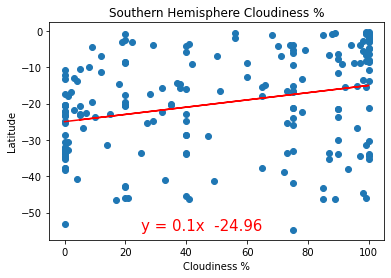

In [33]:
scloud = southern_cities['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scloud, southern_lat)

# Get regression values
regress_values = scloud * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x  " + str(round(intercept,2))

#plotting

plt.scatter(scloud, southern_lat)
plt.plot(scloud,regress_values,"red")

#labels
plt.title("Southern Hemisphere Cloudiness %")
plt.xlabel('Cloudiness %')
plt.ylabel("Latitude")
plt.annotate(line_eq,(25, -55),fontsize=15,color="red")
plt.savefig("../output_data/south_Cloudiness.png")

#observation

Cloudiness does not seem to change between both hemispheres, its fairly constant. However its interesting to see how for the northern hemisphere plot, you can almost see the data points spread vertically in each round value (10, 20, 30, etc.) and parallel to each other. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

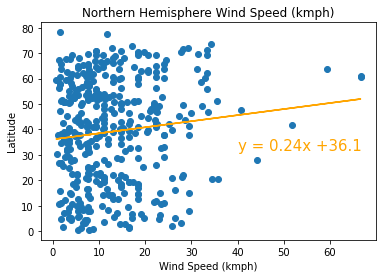

In [57]:
wind = northern_cities['Wind_Speed (kmph)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(wind, north_lat)

# Get regression values
regress_values = wind * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plotting

plt.scatter(wind, north_lat)
plt.plot(wind,regress_values,"orange")

#labels
plt.title("Northern Hemisphere Wind Speed (kmph)")
plt.xlabel('Wind Speed (kmph)')
plt.ylabel("Latitude")
plt.annotate(line_eq,(40, 32),fontsize=15,color="orange")
plt.savefig("../output_data/north_windspeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

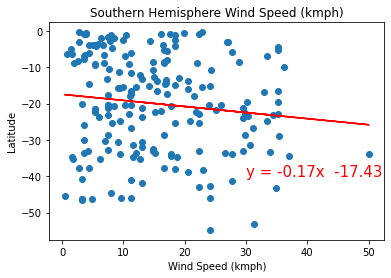

In [59]:
swind = southern_cities['Wind_Speed (kmph)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(swind, southern_lat)

# Get regression values
regress_values = swind * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x  " + str(round(intercept,2))

#plotting

plt.scatter(swind, southern_lat)
plt.plot(swind,regress_values,"red")

#labels
plt.title("Southern Hemisphere Wind Speed (kmph)")
plt.xlabel('Wind Speed (kmph)')
plt.ylabel("Latitude")
plt.annotate(line_eq,(30, -40),fontsize=15,color="red")
plt.savefig("../output_data/south_windspeed.png")

#observations 

Latitude does not have an effect on wind speed. 